# Implementation of Artificial Neural Network (Classification algorithm)

Note: This notebook is developed on Google Colaboratory. GPU should be selected for run-time.

## Importing Tensorflow GPU

In [2]:
pip install tensorflow

In [3]:
import tensorflow as tf
print(tf.__version__)

2.17.1


## Importing basic libraries

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


## Reading the dataset

In [8]:
data = pd.read_csv('Churn_Modelling.csv')

In [9]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [10]:
data.shape

(10000, 14)

## Problem Statement

The above dataser consists of the data of the customers. Based on all the features, we need to predict whether the customer exits or not.

**Type:** Binary Classification

**Dependent**: feature: Exited

## Dividing dataset into dependent and independent features

In [11]:
X = data.iloc[:, 3:13] # independent features (Eliminating first three columns as they are unnecessary)

y = data.iloc[:, 13] # dependent feature (Exited)

In [12]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


## Feature Engineering

The dataset is not clean. Geography, gender are all categorical features. So we need to convert them into numbers.

In [13]:
# The below method pd.get_dummies() performs the one-hot encoding. Like if the dataset
# has the value of France then Germany and Spain will be 0.
# So, to reduce the size we are dropping France (first column) as if its France, then germany and spain will be 0.

geography = pd.get_dummies(X['Geography'], dtype='int', drop_first=True)

# Similarly for gender
gender = pd.get_dummies(X['Gender'], dtype='int', drop_first=True)

## Concatenate the above variables with dataframe

In [14]:
## Dropping the old columns (NOT ROWS)

X = X.drop(['Geography', 'Gender'], axis=1)

In [15]:
X.shape

(10000, 8)

In [16]:
## Concatenating the columns
## Axis = 1 means we are adding column wise not row wise.

X = pd.concat([X, geography, gender], axis=1)

X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [17]:
X.shape

(10000, 11)

## Splitting the dataset into training and testing set

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

## Interview Question: For which algorithms, feature scaling is required?

ANN - Required
Linear Regression - Required

Anything algorithm if distance based, then feature scaling is required and Gradient Descent is present.

That being said, in Decision tree feature scaling is not required.

## Performing Feature scaling

In [19]:
from sklearn.preprocessing import StandardScaler

# initializing StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)

X_test = sc.transform(X_test)

## Interview Question: Why we do we apply fit_transform(Train) and transform(Test) dataset?

We apply `fit_transform()` to the training data and `transform()` to the test data to prevent data leakage.  `fit_transform()` calculates the mean and standard deviation of the training data and then uses these statistics to scale the training data.  If we were to apply `fit_transform()` to the test data as well, it would calculate new mean and standard deviation based on the test data, essentially allowing information from the test set to "leak" into the training process, which would bias the model.  Because the model is evaluated on unseen data (the test data), we want to prevent the model from implicitly using information from that unseen data during training.  By using the statistics learned from the *training data* to transform the *test data*, we ensure the model is evaluated on data scaled in the same way it was trained.  This provides a more realistic evaluation of the model's generalization performance.


## Viewing the transformed data

In [20]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [21]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [22]:
X_train.shape

(8000, 11)

# Creation of ANN

In [23]:
from tensorflow.keras.models import Sequential # block representation - Able to do forward and backward propogation
from tensorflow.keras.layers import Dense # able to create Input, Hidden and Output layers
from tensorflow.keras.layers import LeakyReLU, PReLU, ELU, ReLU # Activation function
from tensorflow.keras.layers import Dropout # Regularization, helps to reduce overfitting.

## Initializing ANN

In [24]:
classifier = Sequential()

## Adding the Input layer

As we have 11 features, we should have 11 nodes.

In [25]:
classifier.add(Dense(units=11, activation = 'relu'))

## Adding the hidden layers

Hidden Layer 1: Adding 7 nodes

In [26]:
classifier.add(Dense(units = 7, activation = 'relu'))

Hidden Layer 2: Adding 7 nodes

In [27]:
classifier.add(Dense(units = 6, activation = 'relu'))

## Adding the output layer

Since its a binary classification, we need to use the Sigmoid activation function.

In [28]:
classifier.add(Dense(units = 1, activation = 'sigmoid'))

## Optimizer

In [29]:
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics = ['accuracy'])

## Learning rate for Adam optimizer

In [30]:
import tensorflow
opt = tensorflow.keras.optimizers.Adam(learning_rate = 0.01)

## Early Stopping

Stop the training of the ANN when the metric which is required has stopped improving.

Below code is taken from Keras documentation.

In [43]:
import tensorflow as tf
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1, # we need all the details
    mode="auto",
    baseline=None,
    restore_best_weights=False
)

## Training the Neural Network

In [45]:
model_history = classifier.fit(X_train, y_train, validation_split= 0.33, batch_size=10, epochs=1000, callbacks=early_stopping)

Epoch 1/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8799 - loss: 0.3018 - val_accuracy: 0.8497 - val_loss: 0.3650
Epoch 2/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8755 - loss: 0.3032 - val_accuracy: 0.8489 - val_loss: 0.3618
Epoch 3/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8705 - loss: 0.3079 - val_accuracy: 0.8455 - val_loss: 0.3650
Epoch 4/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8673 - loss: 0.3091 - val_accuracy: 0.8493 - val_loss: 0.3694
Epoch 5/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8677 - loss: 0.3084 - val_accuracy: 0.8508 - val_loss: 0.3656
Epoch 6/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8674 - loss: 0.3076 - val_accuracy: 0.8489 - val_loss: 0.3664
Epoch 7/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8724 - loss: 0.3017 - val_accuracy: 0.8501 - val_loss: 0.3635
Epoch 8/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8719 - loss: 0.3041 - 

In [46]:
model_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

## Plotting the accuracy achieved

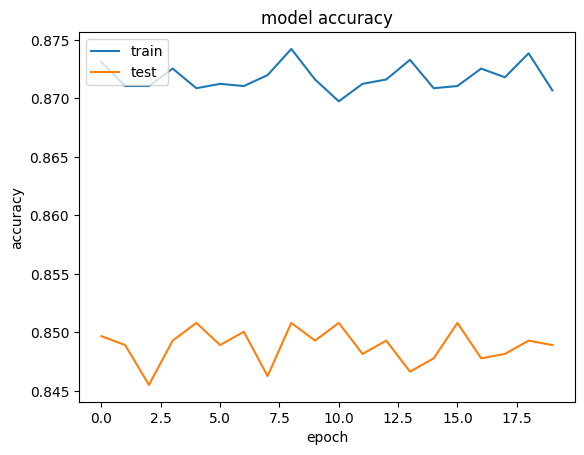

In [47]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

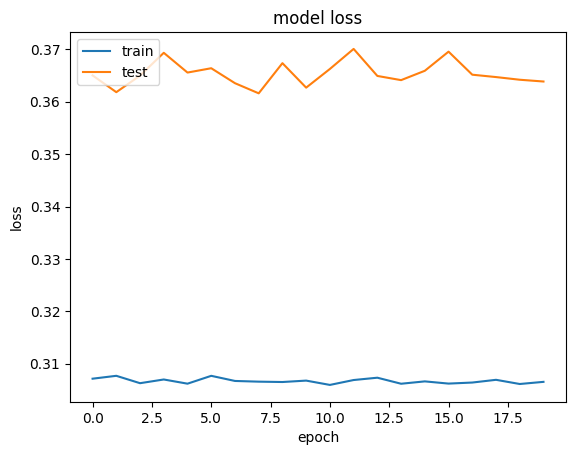

In [48]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Making the predictions and evaluating the model using Confusion matrix

In [49]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred >= 0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


## Generating Confusion matrix

In [50]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1514,   81],
       [ 204,  201]])

## Accuracy score

In [52]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_pred)

score

0.8575

## Get the weights

In [53]:
classifier.get_weights()

[array([[ 0.12670512, -0.11795323,  0.04141165,  0.0590681 ,  0.00601972,
          0.24543162,  0.1760877 ,  0.09224688, -0.14563356, -0.5478256 ,
          0.13456541],
        [ 0.27215546,  0.12325472, -0.42107067,  0.4255817 ,  0.4024492 ,
         -0.7180717 , -0.05884163, -0.94596416,  1.1067568 , -0.10691804,
          0.38661888],
        [ 0.43898532, -0.22314407, -0.29711553,  0.377594  ,  0.1008499 ,
         -0.25743598, -0.7541416 ,  0.31498316,  0.00219048,  0.12005571,
         -0.6202031 ],
        [-0.00575344,  0.8683654 ,  0.29366833, -1.1024404 ,  0.8067947 ,
         -0.25439465, -0.8402542 ,  0.1467133 , -0.35411483, -0.07546657,
         -0.42737186],
        [-0.6403912 ,  0.96402216, -0.56042975,  1.4390683 , -0.9701805 ,
         -0.2503576 ,  0.05527096, -0.0415885 , -0.81976694, -0.43695357,
         -0.1594372 ],
        [ 0.10663058, -0.03469596, -0.35635507,  0.00279971,  0.05113242,
         -0.5186553 ,  0.1914859 ,  0.2996951 , -0.00557237, -0.2475760